# Short Course: Machine Learning for Exploration Geophysics

Hamburg, 10. - 12. March 2020

#### Computer Class 2.1: Decision Trees

Table of Content:
- [Packages](#Packages)
- [Import and preprocess the dataset](#Import-and-preprocess-the-dataset)
- [Visualize the results](#Visualize-the-results)
- [Decision Tree Regressor](#Decision-Tree-Regressor)
- [Visualize the results: max depth](#Visualize-the-results:-max-depth)
- [Visualize a Decision Tree](#Visualize-a-Decision-Tree)

## Packages

Let's first import all the packages: 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a software library for data manipulation and analysis.
- [matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [seaborn](https://seaborn.pydata.org/) is a statistical data visualization library based on matplotlib.
- [scikit-learn](https://scikit-learn.org/stable/) is a simple and efficient tools for predictive data analysis.

In [1]:
#!pip install pandas
#!pip install -U scikit-learn

#!python -m pip install -U pip
#!python -m pip install -U matplotlib

#!pip install pandas

#!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

print('Pandas:  ' + pd.__version__)
print('Numpy:   ' + np.__version__)
print('Sklearn: ' + sklearn.__version__)

Pandas:  0.24.2
Numpy:   1.17.4
Sklearn: 0.22.2.post1


## Import and preprocess the dataset

In [3]:
df = pd.read_csv('data/berlin_flat_price.csv')
df['Price'] = df['Price']/1000;  # in 1000s euro

X = df[['Size']].values
y = df['Price'].values    

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#X_scaled.mean()
#X_scaled.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=False)

## Decision Tree Regressor

[DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


In [4]:
reg = DecisionTreeRegressor(random_state=1, max_depth=2)
reg.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

## Visualize the results

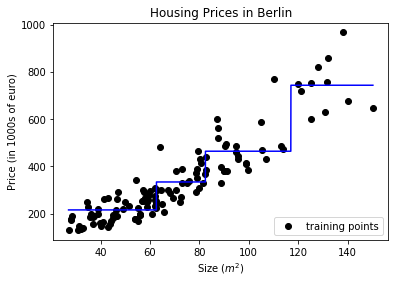

In [5]:
X_plot = np.arange(min(X),max(X),0.01)
X_plot = np.matrix(X_plot).T

fig = plt.figure()
plt.scatter(X_train, y_train, color='black', marker='o', label="training points")
plt.plot(X_plot, reg.predict(X_plot), color='blue')
plt.xlabel('Size ($m^2$)')
plt.ylabel('Price (in 1000s of euro)')
plt.title('Housing Prices in Berlin')
plt.legend(loc='lower right')
plt.show()
fig.tight_layout()

## Visualize the results: max depth

Decision tree depth 1:   Train RMSE: 108.07    Test RMSE: 87.97
Decision tree depth 2:   Train RMSE: 69.33    Test RMSE: 100.39
Decision tree depth 3:   Train RMSE: 60.16    Test RMSE: 103.53
Decision tree depth 4:   Train RMSE: 46.85    Test RMSE: 94.88
Decision tree depth 5:   Train RMSE: 37.65    Test RMSE: 100.74


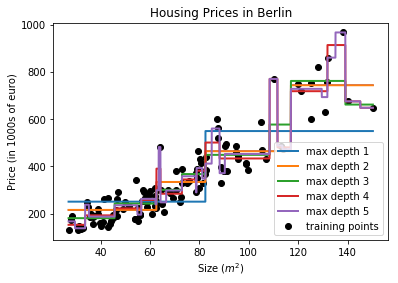

In [6]:
X_plot = np.arange(min(X),max(X),0.01)
X_plot = np.matrix(X_plot).T

fig = plt.figure()
plt.scatter(X_train, y_train, color='black', marker='o', label="training points")
plt.plot(X_plot, reg.predict(X_plot), color='blue')
for count, depth in enumerate([1, 2, 3, 4, 5]):
    tree_reg = DecisionTreeRegressor(random_state=1, max_depth=depth)
    tree_reg.fit(X_train, y_train)
    y_plot = tree_reg.predict(X_plot)
    plt.plot(X_plot, y_plot, linewidth=2, label="max depth %d" % depth)
    print('Decision tree depth %d:' % depth 
          + '   Train RMSE: ' + '%.2f' % mean_squared_error(y_train, tree_reg.predict(X_train), squared=False)
          + '    Test RMSE: ' + '%.2f' % mean_squared_error(y_test, tree_reg.predict(X_test), squared=False))

plt.xlabel('Size ($m^2$)')
plt.ylabel('Price (in 1000s of euro)')
plt.title('Housing Prices in Berlin')
plt.legend(loc='lower right')
plt.show()
fig.tight_layout()

## Visualize a Decision Tree

[Text(167.4, 181.2, 'X[0] <= 82.42\nmse = 30081.464\nsamples = 124\nvalue = 337.204'),
 Text(83.7, 108.72, 'X[0] <= 62.595\nmse = 5988.827\nsamples = 88\nvalue = 250.437'),
 Text(41.85, 36.23999999999998, 'mse = 2477.668\nsamples = 62\nvalue = 215.487'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 4502.741\nsamples = 26\nvalue = 333.78'),
 Text(251.10000000000002, 108.72, 'X[0] <= 117.005\nmse = 25586.938\nsamples = 36\nvalue = 549.3'),
 Text(209.25, 36.23999999999998, 'mse = 8308.38\nsamples = 25\nvalue = 463.962'),
 Text(292.95, 36.23999999999998, 'mse = 10687.839\nsamples = 11\nvalue = 743.251')]

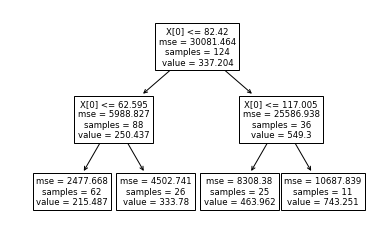

In [7]:
plot_tree(reg)